In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, cross_val_score
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [37]:
df = pd.read_csv('./data/gm_2008_region.csv')
df.head()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality,Region
0,34811059.0,2.73,0.1,3.328945,24.59620,12314.0,129.9049,75.3,29.5,Middle East & North Africa
1,19842251.0,6.43,2.0,1.474353,22.25083,7103.0,130.1247,58.3,192.0,Sub-Saharan Africa
2,40381860.0,2.24,0.5,4.785170,27.50170,14646.0,118.8915,75.5,15.4,America
3,2975029.0,1.40,0.1,1.804106,25.35542,7383.0,132.8108,72.5,20.0,Europe & Central Asia
4,21370348.0,1.96,0.1,18.016313,27.56373,41312.0,117.3755,81.5,5.2,East Asia & Pacific


In [38]:
y = df['life'].values
x_fertility = df['fertility'].values
y = y.reshape(-1,1)
x_fertility = x_fertility.reshape(-1,1)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139 entries, 0 to 138
Data columns (total 10 columns):
population         139 non-null float64
fertility          139 non-null float64
HIV                139 non-null float64
CO2                139 non-null float64
BMI_male           139 non-null float64
GDP                139 non-null float64
BMI_female         139 non-null float64
life               139 non-null float64
child_mortality    139 non-null float64
Region             139 non-null object
dtypes: float64(9), object(1)
memory usage: 11.0+ KB


In [40]:
df.describe()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality
count,1.390000e+02,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000
mean,3.549977e+07,3.005108,1.915612,4.459874,24.623054,16638.784173,126.701914,69.602878,45.097122
std,1.095121e+08,1.615354,4.408974,6.268349,2.209368,19207.299083,4.471997,9.122189,45.724667
min,2.773150e+05,1.280000,0.060000,0.008618,20.397420,588.000000,117.375500,45.200000,2.700000
25%,3.752776e+06,1.810000,0.100000,0.496190,22.448135,2899.000000,123.232200,62.200000,8.100000
50%,9.705130e+06,2.410000,0.400000,2.223796,25.156990,9938.000000,126.519600,72.000000,24.000000
75%,2.791973e+07,4.095000,1.300000,6.589156,26.497575,23278.500000,130.275900,76.850000,74.200000
max,1.197070e+09,7.590000,25.900000,48.702062,28.456980,126076.000000,135.492000,82.600000,192.000000


In [41]:
df.head()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality,Region
0,34811059.0,2.73,0.1,3.328945,24.59620,12314.0,129.9049,75.3,29.5,Middle East & North Africa
1,19842251.0,6.43,2.0,1.474353,22.25083,7103.0,130.1247,58.3,192.0,Sub-Saharan Africa
2,40381860.0,2.24,0.5,4.785170,27.50170,14646.0,118.8915,75.5,15.4,America
3,2975029.0,1.40,0.1,1.804106,25.35542,7383.0,132.8108,72.5,20.0,Europe & Central Asia
4,21370348.0,1.96,0.1,18.016313,27.56373,41312.0,117.3755,81.5,5.2,East Asia & Pacific


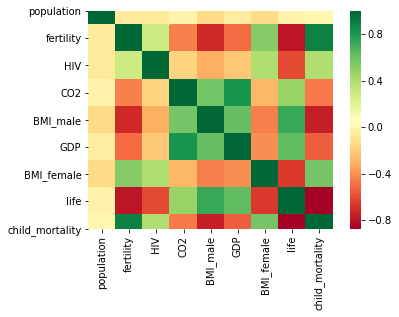

In [42]:
# Plotting heatmap
sns.heatmap(df.corr(), square = True, cmap = 'RdYlGn')

In [43]:
#fitting model with one feature
reg = LinearRegression()
prediction_space = np.linspace(min(x_fertility), max(x_fertility)).reshape(-1,1)
reg.fit(x_fertility, y)
y_prediction = reg.predict(prediction_space)
print('r square = ', round(reg.score(x_fertility, y),2))

r square =  0.62


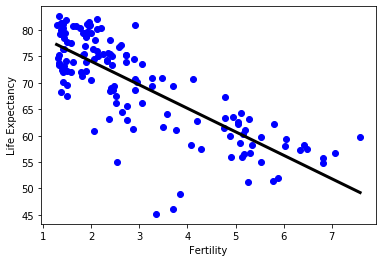

In [44]:
plt.scatter(x_fertility, y, color='blue')
plt.xlabel('Fertility')
plt.ylabel('Life Expectancy')
plt.plot(prediction_space, y_prediction, color='black', linewidth=3)
plt.show()

In [45]:
#split train/test set and fit all features
x = df.drop(['life','Region'], axis=1).values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
reg_all = LinearRegression()
reg_all.fit(x_train, y_train)
y_prediction = reg_all.predict(x_test)
print('r^2 : ', round(reg_all.score(x_test,y_test),2))
rmse = np.sqrt(mean_squared_error(y_test, y_prediction))
print('rmse : ', round(rmse,2))

r^2 :  0.84
rmse :  3.25


In [46]:
#5 fold cross validation
cv_scores = cross_val_score(reg_all, x, y, cv=5)
print(cv_scores)
print('average r^2 is ', round(np.mean(cv_scores),2))

[0.81720569 0.82917058 0.90214134 0.80633989 0.94495637]
average r^2 is  0.86


In [47]:
#regularization (ridge regression)
#loss function = OLS loss function * alpha Σ ai^2 , ai are model coefficients, alpha is a parameter that we assign (hyperparameter tuning)
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 42)
ridge = Ridge(alpha = 0.1, normalize=True)
ridge.fit(x_train, y_train)
ridge_pred = ridge.predict(x_test)
print('ridge score = ', round(ridge.score(x_test,y_test),2))

ridge score =  0.84


In [48]:
#regularization (lasso regression)
#loss function = OLS loss function * alpha Σ abs(ai) , ai are model coefficients, alpha is a parameter that we assign
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 42)
lasso = Lasso(alpha=0.1, normalize=True)
lasso.fit(x_train, y_train)
lasso_pred = lasso.predict(x_test)
print('lasso score = ', round(lasso.score(x_test,y_test), 2))

lasso score =  0.87


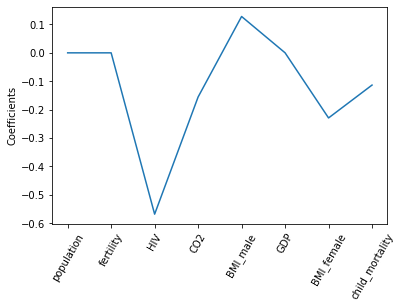

In [49]:
#lasso shinks coeffients of unimportant features (features selection)
names = df.drop(['life', 'Region'], axis=1).columns
lasso = Lasso(alpha=0.4)
lasso_coef = lasso.fit(x,y).coef_
_ = plt.plot(range(len(names)), lasso_coef)
_ = plt.xticks(range(len(names)), names, rotation=60)
_ = plt.ylabel('Coefficients')
_ = plt.show()